In [18]:
import matplotlib.pyplot as plt
import numpy as np
import csv

# Comparação - 30 execuções - 20000 iterações

In [19]:
es_1p1 = []
es_pi = []
es_pni = []
D = []
E = []

with open(f'comparison-30runs-20000it.csv', 'r', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='\'')
    next(reader, None)
    for row in reader:
        es_1p1.append(float(row[0]))
        es_pi.append(float(row[1]))
        es_pni.append(float(row[2]))


print(es_1p1)
print(es_pi)
print(es_pni)


[32.943969, 32.943969, 94.422854, 95.225046, 93.605274, 43.858682, 95.284215, 39.534723, 31.570817, 49.08477, 29.331805, 28.17047, 30.118182, 90.974807, 102.563295, 98.539253, 33.203032, 92.53458, 33.368859, 91.853624, 27.823391, 96.293746, 98.052436, 27.413017, 34.940075, 30.546297, 91.032191, 28.680987, 109.941925, 99.212942]
[29.683163, 29.683163, 31.096471, 42.396457, 94.732453, 33.636604, 94.507678, 88.01176, 87.831004, 31.44885, 92.827641, 39.593523, 94.760511, 96.021893, 58.139905, 31.894751, 29.854841, 32.293111, 35.405836, 35.022945, 57.161148, 87.36353, 30.741958, 85.567312, 28.266641, 33.603215, 86.599758, 88.946906, 29.951651, 32.751702]
[60.237291, 60.237291, 94.297864, 50.501198, 82.002499, 81.394898, 98.676129, 88.387437, 62.940307, 36.754859, 46.802779, 84.957667, 77.205353, 97.733364, 57.102824, 31.743017, 77.846433, 71.674609, 69.5022, 92.454021, 61.496786, 58.586329, 96.803307, 99.854444, 42.726185, 76.034814, 98.400344, 54.583275, 68.529933, 100.797861]


C:\Users\patri\AppData\Local\Temp\ipykernel_72780\1434743253.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


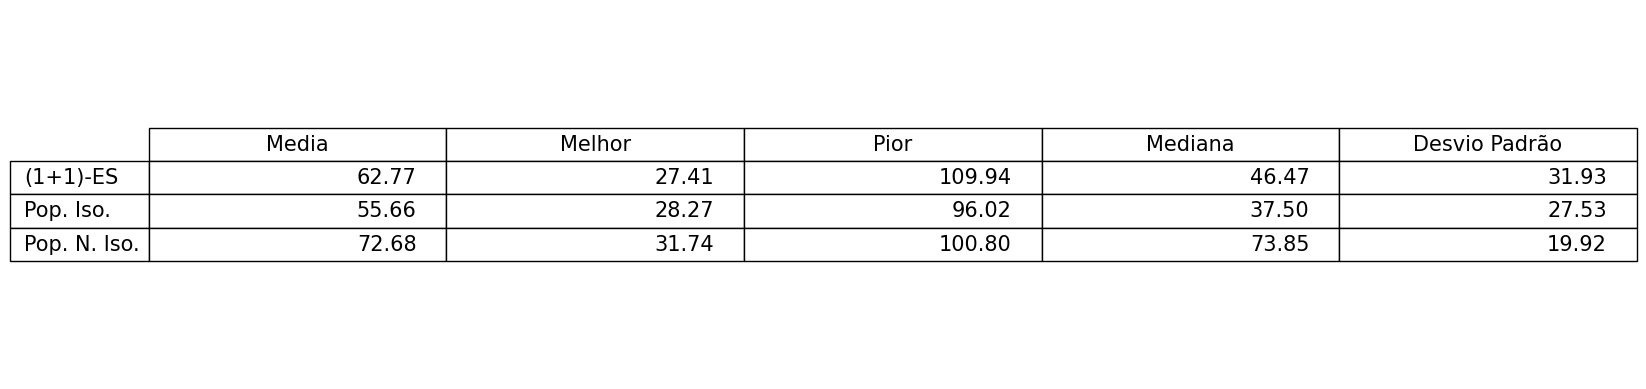

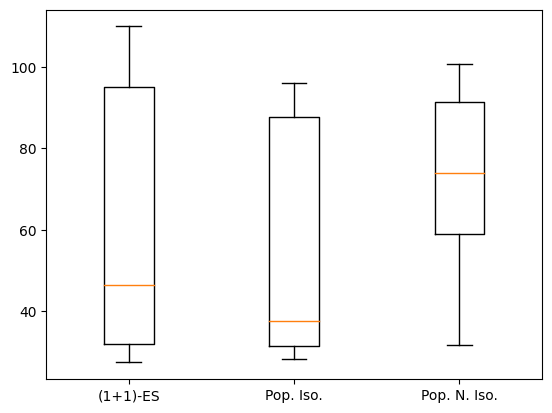

In [20]:
tabela = [None, None, None]


def table_row(array):
    row = [f"{np.average(array):.2f}", f"{np.min(array):.2f}", f"{np.max(array):.2f}", f"{np.median(array):.2f}",f"{np.std(array):.2f}"]
    return row


tabela[0] = table_row(es_1p1)
tabela[1] = table_row(es_pi)
tabela[2] = table_row(es_pni)

fig, ax = plt.subplots()
# hide axes
fig.patch.set_visible(False)

ax.axis('off')
ax.axis('tight')
colLabels = ['Media', 'Melhor', 'Pior', 'Mediana', 'Desvio Padrão']
rowLabels = ["(1+1)-ES", "Pop. Iso.", "Pop. N. Iso."]
table = ax.table(tabela, colLabels=colLabels, rowLabels=rowLabels, loc='center')
table.scale(3, 2)
table.set_fontsize(15)
fig.tight_layout()

fig_boxplot, ax_boxplot = plt.subplots()
ax_boxplot.boxplot(x=[es_1p1, es_pi, es_pni], labels=["(1+1)-ES", "Pop. Iso.", "Pop. N. Iso."])

plt.show()